# Explore here

In [10]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt


In [2]:
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

print(client_id, client_secret)

1d23e2583c784cc59ca3b54ba929f529 8f5dbc598fbb4ae684b4ad57953d9a21


In [5]:
spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

artist_id = "3Nrfpe0tUJi4K4DXYWgMUX"

# Función para obtener el top 10 de canciones del artista
def get_top_tracks(artist_id):
    results = spotify.artist_top_tracks(artist_id)
    tracks = results["tracks"][:10]  # Top 10 canciones
    return [
        {
            "nombre": track["name"],
            "popularidad": track["popularity"],
            "duracion_minutos": round(track["duration_ms"] / 60000, 2)
        }
        for track in tracks
    ]
top_tracks = get_top_tracks(artist_id)
top_tracks

[{'nombre': 'FAKE LOVE', 'popularidad': 75, 'duracion_minutos': 4.04},
 {'nombre': 'Dynamite', 'popularidad': 76, 'duracion_minutos': 3.32},
 {'nombre': 'My Universe', 'popularidad': 72, 'duracion_minutos': 3.77},
 {'nombre': 'Boy With Luv (feat. Halsey)',
  'popularidad': 72,
  'duracion_minutos': 3.83},
 {'nombre': 'Left and Right (Feat. Jung Kook of BTS)',
  'popularidad': 70,
  'duracion_minutos': 2.57},
 {'nombre': 'Life Goes On', 'popularidad': 71, 'duracion_minutos': 3.46},
 {'nombre': 'Butter', 'popularidad': 70, 'duracion_minutos': 2.75},
 {'nombre': 'Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack]',
  'popularidad': 71,
  'duracion_minutos': 3.36},
 {'nombre': 'Run BTS', 'popularidad': 71, 'duracion_minutos': 3.42},
 {'nombre': 'Spring Day', 'popularidad': 69, 'duracion_minutos': 4.57}]

In [9]:
df = pd.DataFrame(top_tracks)

# Ordenar por popularidad creciente
df_sorted = df.sort_values(by="popularidad", ascending=True)

# Mostrar el top 3 más popular
top_3 = df_sorted.head(3)
top_3


,nombre,popularidad,duracion_minutos
9,Spring Day,69,4.57
6,Butter,70,2.75
4,Left and Right (Feat. Jung Kook of BTS),70,2.57


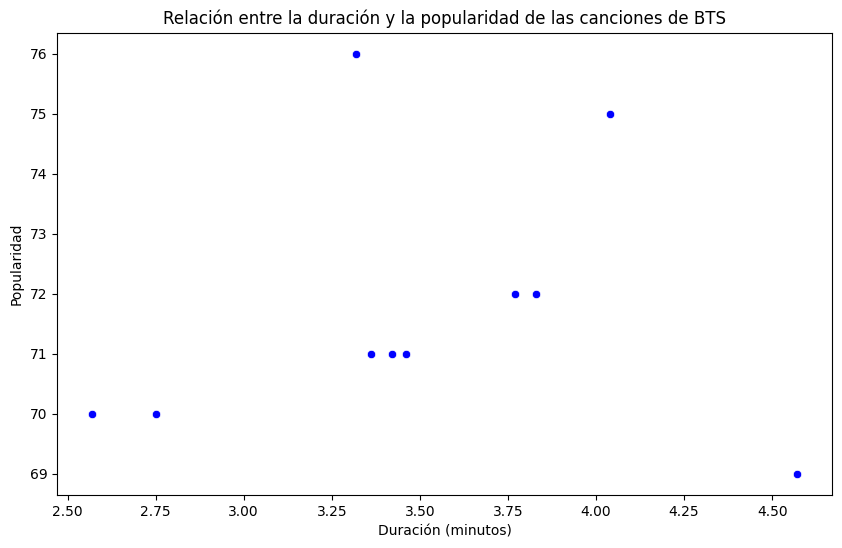

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="duracion_minutos", y="popularidad", marker='o', color='b')

# Título y etiquetas
plt.title('Relación entre la duración y la popularidad de las canciones de BTS')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')

# Mostrar el gráfico
plt.show()

No hay una relación clara entre la duración de las canciones y su popularidad en BTS. El gráfico muestra una dispersión de puntos, lo que sugiere que otros factores, como la calidad de la producción y la conexión con los fanáticos, juegan un papel más importante que la duración en el éxito de las canciones.